#### Correlación por Parámetro 80ft y 1100ft por día VS Concentración del Glifosato (C= 0, 0.4, 1.5, 3 y juntos)
 

### Se importan las librerias

In [1]:
# Se importan las librerias
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

### Se cargan los datos

In [2]:
data = pd.read_csv("data/data_all.csv", sep=";")

data

,date,date(m/d/y),time,day,concentration,chloride_80ft(mg/L),chloride_1100ft(mg/L),difference_chloride,CL2_80ft(PPM),CL2_1100ft(PPM),...,difference_ORP_YSI,pH_YSI_80ft,pH_YSI_1100ft,difference_pH,sp_cond_YSI_80ft(µS/cm),sp_cond_YSI_1100ft(µS/cm),difference_sp_cond_YSI,turbidity_YSI_80ft(NTU+),turbidity_YSI_1100ft(NTU+),difference_turbidity
0,25/01/05 12:30,25/01/05,12.30,1,0.0,16.33,17.02,0.69,1.02,1.05,...,75,7.23,8.68,1.45,281,284,3,0.5,0.1,-0.4
1,25/01/05 12:31,25/01/05,12.31,1,0.0,16.39,17.12,0.73,1.02,1.05,...,75,7.22,8.67,1.45,281,283,2,0.8,0.1,-0.7
2,25/01/05 12:32,25/01/05,12.32,1,0.0,16.39,17.12,0.73,1.02,1.05,...,75,7.22,8.68,1.46,281,283,2,0.8,0.1,-0.7
3,25/01/05 12:33,25/01/05,12.33,1,0.0,16.38,17.11,0.73,1.02,1.04,...,76,7.22,8.68,1.46,281,283,2,0.8,0.1,-0.7
4,25/01/05 12:34,25/01/05,12.34,1,0.0,16.39,17.03,0.64,1.02,1.04,...,76,7.22,8.68,1.46,281,284,3,0.7,0.1,-0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621,26/01/05 15:56,26/01/05,15.56,2,3.0,16.37,17.93,1.56,1.00,1.02,...,95,7.17,8.72,1.55,287,289,2,0.8,0.0,-0.8
622,26/01/05 15:57,26/01/05,15.57,2,3.0,16.38,17.92,1.54,1.00,1.01,...,96,7.17,8.72,1.55,287,289,2,0.9,0.0,-0.9
623,26/01/05 15:58,26/01/05,15.58,2,3.0,16.37,17.90,1.53,1.00,1.01,...,96,7.17,8.71,1.54,287,289,2,0.8,0.0,-0.8
624,26/01/05 15:59,26/01/05,15.59,2,3.0,16.35,17.91,1.56,1.00,1.01,...,97,7.16,8.71,1.55,287,289,2,0.9,0.0,-0.9


### Preprocesamiento

In [3]:
# Se buscan registros NaN para eliminarlos
print('Columna      Cantidad NaN')
print(data.isnull().sum(axis = 0))
print(data.shape)

Columna      Cantidad NaN
date                           0
date(m/d/y)                    0
time                           0
day                            0
concentration                  0
chloride_80ft(mg/L)            0
chloride_1100ft(mg/L)          0
difference_chloride            0
CL2_80ft(PPM)                  0
CL2_1100ft(PPM)                0
difference_CL2                 0
DO_YSI_80ft(mg/L)              0
DO_YSI_1100ft(mg/L)            0
difference_DO_YSI              0
FreeClorine_ATI_80ft(PPM)      0
FreeClorine_ATI_1100ft(PPM)    0
difference_FreeClorine_ATI     0
FreeClorine_X_80ft(PPM)        0
FreeClorine_X_1100ft(PPM)      0
difference_FreeClorine_X       0
ORP_YSI_80ft(mV)               0
ORP_YSI_1100ft(mV)             0
difference_ORP_YSI             0
pH_YSI_80ft                    0
pH_YSI_1100ft                  0
difference_pH                  0
sp_cond_YSI_80ft(µS/cm)        0
sp_cond_YSI_1100ft(µS/cm)      0
difference_sp_cond_YSI         0
turbidity_YSI_80f

In [4]:
# Se eliminan los registros NaN del DataFrame
#data = data.dropna()

In [5]:
# Se genera las estadísticas del DataFrame
data.describe()

,time,day,concentration,chloride_80ft(mg/L),chloride_1100ft(mg/L),difference_chloride,CL2_80ft(PPM),CL2_1100ft(PPM),difference_CL2,DO_YSI_80ft(mg/L),...,difference_ORP_YSI,pH_YSI_80ft,pH_YSI_1100ft,difference_pH,sp_cond_YSI_80ft(µS/cm),sp_cond_YSI_1100ft(µS/cm),difference_sp_cond_YSI,turbidity_YSI_80ft(NTU+),turbidity_YSI_1100ft(NTU+),difference_turbidity
count,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,...,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000
mean,13.869968,1.504792,1.161981,16.382061,17.323882,0.941821,0.932812,0.953690,0.020911,14.553035,...,103.948882,7.156677,8.652077,1.495399,283.683706,286.035144,2.351438,0.745367,0.068371,-0.676997
std,1.857436,0.500377,1.164567,0.285729,0.511636,0.600773,0.155687,0.158904,0.234459,0.145409,...,32.323375,0.050923,0.091153,0.110395,2.617900,2.224671,0.625695,0.167960,0.101617,0.192369
min,10.050000,1.000000,0.000000,15.620000,16.550000,-0.360000,0.470000,0.490000,-0.510000,14.130000,...,56.000000,6.980000,8.240000,1.060000,281.000000,283.000000,1.000000,0.000000,-0.100000,-2.500000
25%,12.562500,1.000000,0.000000,16.290000,16.880000,0.460000,0.982500,1.000000,0.000000,14.530000,...,79.000000,7.140000,8.650000,1.470000,281.000000,284.000000,2.000000,0.700000,0.000000,-0.800000
50%,14.120000,2.000000,0.400000,16.390000,17.105000,0.870000,1.000000,1.020000,0.020000,14.610000,...,100.000000,7.150000,8.670000,1.490000,285.000000,287.000000,2.000000,0.800000,0.000000,-0.700000
75%,15.287500,2.000000,1.500000,16.470000,17.880000,1.590000,1.010000,1.040000,0.030000,14.640000,...,114.000000,7.190000,8.700000,1.560000,286.000000,288.000000,3.000000,0.800000,0.100000,-0.600000
max,17.300000,2.000000,3.000000,17.120000,18.350000,1.930000,1.030000,1.050000,0.560000,14.740000,...,251.000000,7.230000,8.730000,1.750000,287.000000,289.000000,3.000000,2.600000,0.500000,0.100000


### -------------------------------------------------------------------------------

## Correlaciones

### -------------------------------------------------------------------------------

### Para cada parámetro VS Concentración del glifosato = 0.0

In [73]:
# Se crea el set de datos solo para concentración = 0.0
data_00 = data[data['concentration'] == 3.0]

#data_04 = data[data['concentration'] == 0.4]
#data_15 = data[data['concentration'] == 1.5]
#data_30 = data[data['concentration'] == 3.0]

### -------------------------------------------------------------------------------

### Chloride

Text(0, 0.5, 'Concentration Glyphosate')

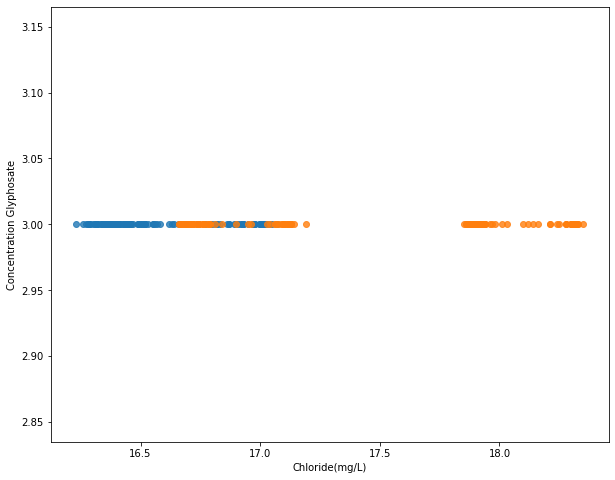

In [74]:
# Gráfico de Dispersión
fig, ax = plt.subplots(1, 1, figsize=(10,8))
# Azul
ax.scatter(x= data_00['chloride_80ft(mg/L)'], y= data_00['concentration'], alpha= 0.8)
# Naranja
ax.scatter(x= data_00['chloride_1100ft(mg/L)'], y= data_00['concentration'], alpha= 0.8)
ax.set_xlabel('Chloride(mg/L)')
ax.set_ylabel('Concentration Glyphosate')

In [75]:
# Cálculo de correlaciones 

# Parametro 80ft
print("*** Chloride 80ft (mg/L) VS Concentración Glifosato ***")
print('Correlación Pearson: ', data_00['chloride_80ft(mg/L)'].corr(data_00['concentration'], method='pearson'))
print('Correlación Spearman: ', data_00['chloride_80ft(mg/L)'].corr(data_00['concentration'], method='spearman'))
print('Correlación Kendall: ', data_00['chloride_80ft(mg/L)'].corr(data_00['concentration'], method='kendall'))
print("-------------------------------------------")

# Parametro 1100ft  
print("*** Chloride 1100 ft (mg/L) VS Concentración Glifosato *** ")
print('Correlación Pearson: ', data_00['chloride_1100ft(mg/L)'].corr(data_00['concentration'], method='pearson'))
print('Correlación Spearman: ', data_00['chloride_1100ft(mg/L)'].corr(data_00['concentration'], method='spearman'))
print('Correlación Kendall: ', data_00['chloride_1100ft(mg/L)'].corr(data_00['concentration'], method='kendall'))
print("-------------------------------------------")


*** Chloride 80ft (mg/L) VS Concentración Glifosato ***
Correlación Pearson:  nan
Correlación Spearman:  nan
Correlación Kendall:  nan
-------------------------------------------
*** Chloride 1100 ft (mg/L) VS Concentración Glifosato *** 
Correlación Pearson:  nan
Correlación Spearman:  nan
Correlación Kendall:  nan
-------------------------------------------


### -------------------------------------------------------------------------------

### CL2

Text(0, 0.5, 'Concentration Glyphosate')

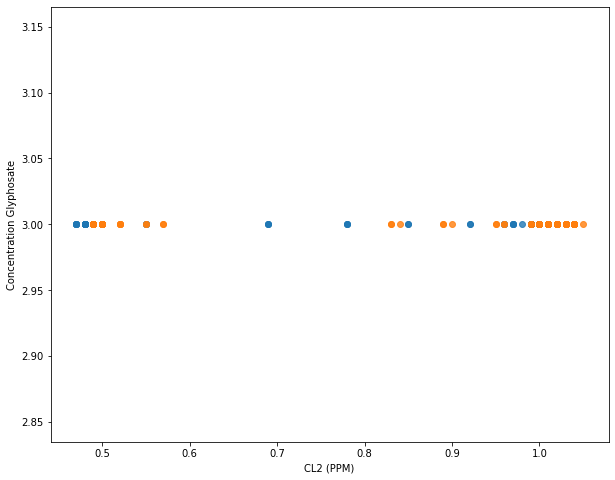

In [76]:
# Gráfico de Dispersión
fig, ax = plt.subplots(1, 1, figsize=(10,8))
# Azul
ax.scatter(x= data_00['CL2_80ft(PPM)'], y= data_00['concentration'], alpha= 0.8)
# Naranja
ax.scatter(x= data_00['CL2_1100ft(PPM)'], y= data_00['concentration'], alpha= 0.8)
ax.set_xlabel('CL2 (PPM)')
ax.set_ylabel('Concentration Glyphosate')

In [77]:
# Cálculo de correlaciones 

# Parametro 80ft
print("*** CL2 80ft (PPM) VS Concentración Glifosato ***")
print('Correlación Pearson: ', data_00['CL2_80ft(PPM)'].corr(data_00['concentration'], method='pearson'))
print('Correlación Spearman: ', data_00['CL2_80ft(PPM)'].corr(data_00['concentration'], method='spearman'))
print('Correlación Kendall: ', data_00['CL2_80ft(PPM)'].corr(data_00['concentration'], method='kendall'))
print("-------------------------------------------")

# Parametro 1100ft 
print("*** CL2 1100ft (PPM) VS Concentración Glifosato *** ")
print('Correlación Pearson: ', data_00['CL2_1100ft(PPM)'].corr(data_00['concentration'], method='pearson'))
print('Correlación Spearman: ', data_00['CL2_1100ft(PPM)'].corr(data_00['concentration'], method='spearman'))
print('Correlación Kendall: ', data_00['CL2_1100ft(PPM)'].corr(data_00['concentration'], method='kendall'))
print("-------------------------------------------")


*** CL2 80ft (PPM) VS Concentración Glifosato ***
Correlación Pearson:  nan
Correlación Spearman:  nan
Correlación Kendall:  nan
-------------------------------------------
*** CL2 1100ft (PPM) VS Concentración Glifosato *** 
Correlación Pearson:  nan
Correlación Spearman:  nan
Correlación Kendall:  nan
-------------------------------------------


### -------------------------------------------------------------------------------

### DO YSI

Text(0, 0.5, 'Concentration Glyphosate')

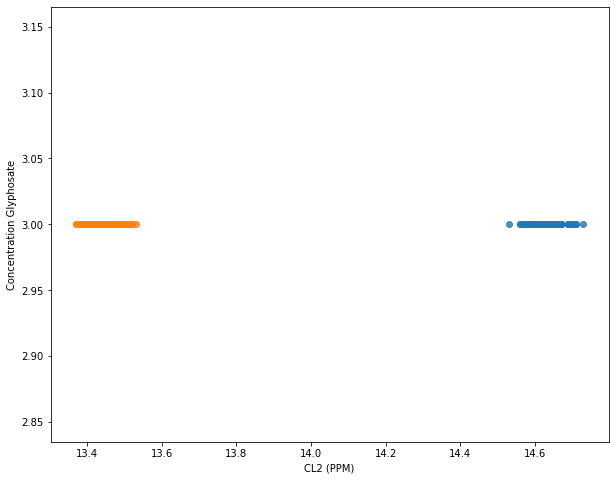

In [78]:
# Gráfico de Dispersión
fig, ax = plt.subplots(1, 1, figsize=(10,8))
# Azul
ax.scatter(x= data_00['DO_YSI_80ft(mg/L)'], y= data_00['concentration'], alpha= 0.8)
# Naranja
ax.scatter(x= data_00['DO_YSI_1100ft(mg/L)'], y= data_00['concentration'], alpha= 0.8)
ax.set_xlabel('CL2 (PPM)')
ax.set_ylabel('Concentration Glyphosate')

In [79]:
# Cálculo de correlaciones 

# Parametro 80ft
print("*** DO_YSI 80ft (mg/L) VS Concentración Glifosato ***")
print('Correlación Pearson: ', data_00['DO_YSI_80ft(mg/L)'].corr(data_00['concentration'], method='pearson'))
print('Correlación Spearman: ', data_00['DO_YSI_80ft(mg/L)'].corr(data_00['concentration'], method='spearman'))
print('Correlación Kendall: ', data_00['DO_YSI_80ft(mg/L)'].corr(data_00['concentration'], method='kendall'))
print("-------------------------------------------")

# Parametro 1100ft 
print("*** DO_YSI 1100ft (mg/L) VS Concentración Glifosato *** ")
print('Correlación Pearson: ', data_00['DO_YSI_1100ft(mg/L)'].corr(data_00['concentration'], method='pearson'))
print('Correlación Spearman: ', data_00['DO_YSI_1100ft(mg/L)'].corr(data_00['concentration'], method='spearman'))
print('Correlación Kendall: ', data_00['DO_YSI_1100ft(mg/L)'].corr(data_00['concentration'], method='kendall'))
print("-------------------------------------------")

*** DO_YSI 80ft (mg/L) VS Concentración Glifosato ***
Correlación Pearson:  nan
Correlación Spearman:  nan
Correlación Kendall:  nan
-------------------------------------------
*** DO_YSI 1100ft (mg/L) VS Concentración Glifosato *** 
Correlación Pearson:  nan
Correlación Spearman:  nan
Correlación Kendall:  nan
-------------------------------------------


### -------------------------------------------------------------------------------

### FreeClorine ATI

Text(0, 0.5, 'Concentration Glyphosate')

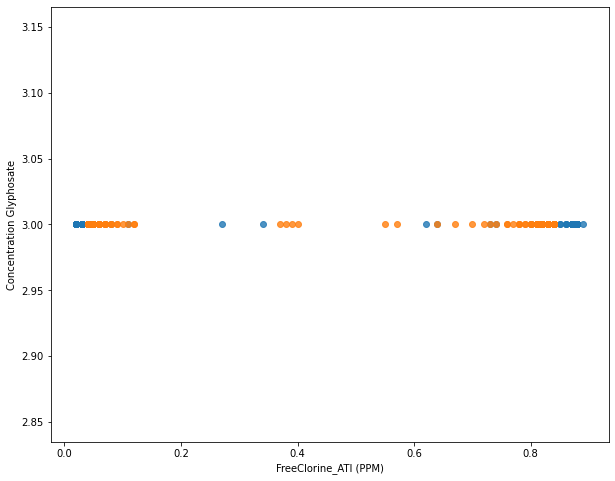

In [80]:
# Gráfico de Dispersión
fig, ax = plt.subplots(1, 1, figsize=(10,8))
# Azul
ax.scatter(x= data_00['FreeClorine_ATI_80ft(PPM)'], y= data_00['concentration'], alpha= 0.8)
# Naranja
ax.scatter(x= data_00['FreeClorine_ATI_1100ft(PPM)'], y= data_00['concentration'], alpha= 0.8)
ax.set_xlabel('FreeClorine_ATI (PPM)')
ax.set_ylabel('Concentration Glyphosate')

In [81]:
# Cálculo de correlaciones 

# Parametro 80ft
print("*** FreeClorine_ATI 80ft (PPM) VS Concentración Glifosato ***")
print('Correlación Pearson: ', data_00['FreeClorine_ATI_80ft(PPM)'].corr(data_00['concentration'], method='pearson'))
print('Correlación Spearman: ', data_00['FreeClorine_ATI_80ft(PPM)'].corr(data_00['concentration'], method='spearman'))
print('Correlación Kendall: ', data_00['FreeClorine_ATI_80ft(PPM)'].corr(data_00['concentration'], method='kendall'))
print("-------------------------------------------")

# Parametro 1100ft 
print("*** FreeClorine_ATI 1100ft (PPM) VS Concentración Glifosato *** ")
print('Correlación Pearson: ', data_00['FreeClorine_ATI_1100ft(PPM)'].corr(data_00['concentration'], method='pearson'))
print('Correlación Spearman: ', data_00['FreeClorine_ATI_1100ft(PPM)'].corr(data_00['concentration'], method='spearman'))
print('Correlación Kendall: ', data_00['FreeClorine_ATI_1100ft(PPM)'].corr(data_00['concentration'], method='kendall'))
print("-------------------------------------------")

*** FreeClorine_ATI 80ft (PPM) VS Concentración Glifosato ***
Correlación Pearson:  nan
Correlación Spearman:  nan
Correlación Kendall:  nan
-------------------------------------------
*** FreeClorine_ATI 1100ft (PPM) VS Concentración Glifosato *** 
Correlación Pearson:  nan
Correlación Spearman:  nan
Correlación Kendall:  nan
-------------------------------------------


### -------------------------------------------------------------------------------

### FreeClorine X

Text(0, 0.5, 'Concentration Glyphosate')

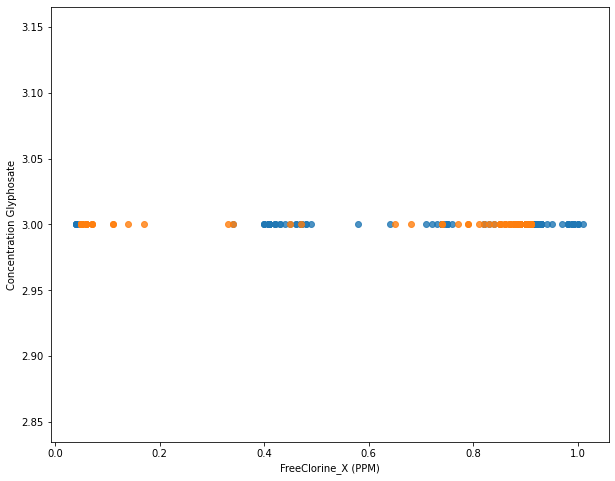

In [82]:
# Gráfico de Dispersión
fig, ax = plt.subplots(1, 1, figsize=(10,8))
# Azul
ax.scatter(x= data_00['FreeClorine_X_80ft(PPM)'], y= data_00['concentration'], alpha= 0.8)
# Naranja
ax.scatter(x= data_00['FreeClorine_X_1100ft(PPM)'], y= data_00['concentration'], alpha= 0.8)
ax.set_xlabel('FreeClorine_X (PPM)')
ax.set_ylabel('Concentration Glyphosate')

In [83]:
# Cálculo de correlaciones 

# Parametro 80ft
print("*** FreeClorine X 80ft (PPM) VS Concentración Glifosato ***")
print('Correlación Pearson: ', data_00['FreeClorine_X_80ft(PPM)'].corr(data_00['concentration'], method='pearson'))
print('Correlación Spearman: ', data_00['FreeClorine_X_80ft(PPM)'].corr(data_00['concentration'], method='spearman'))
print('Correlación Kendall: ', data_00['FreeClorine_X_80ft(PPM)'].corr(data_00['concentration'], method='kendall'))
print("-------------------------------------------")

# Parametro 1100ft 
print("*** FreeClorine X 1100ft (PPM) VS Concentración Glifosato *** ")
print('Correlación Pearson: ', data_00['FreeClorine_X_1100ft(PPM)'].corr(data_00['concentration'], method='pearson'))
print('Correlación Spearman: ', data_00['FreeClorine_X_1100ft(PPM)'].corr(data_00['concentration'], method='spearman'))
print('Correlación Kendall: ', data_00['FreeClorine_X_1100ft(PPM)'].corr(data_00['concentration'], method='kendall'))
print("-------------------------------------------")

*** FreeClorine X 80ft (PPM) VS Concentración Glifosato ***
Correlación Pearson:  nan
Correlación Spearman:  nan
Correlación Kendall:  nan
-------------------------------------------
*** FreeClorine X 1100ft (PPM) VS Concentración Glifosato *** 
Correlación Pearson:  nan
Correlación Spearman:  nan
Correlación Kendall:  nan
-------------------------------------------


### -------------------------------------------------------------------------------

### ORP YSI

Text(0, 0.5, 'Concentration Glyphosate')

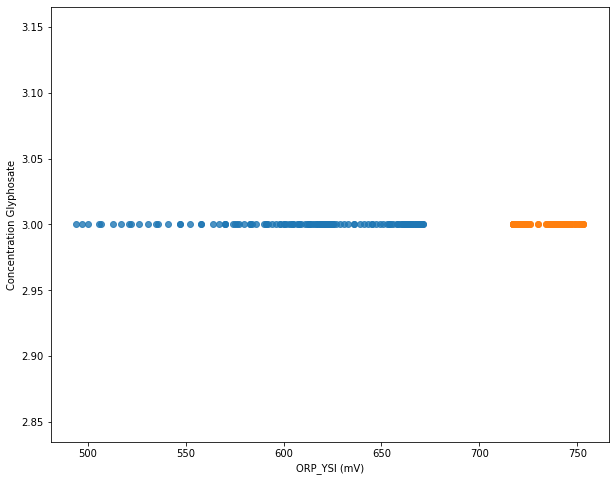

In [84]:
# Gráfico de Dispersión
fig, ax = plt.subplots(1, 1, figsize=(10,8))
# Azul
ax.scatter(x= data_00['ORP_YSI_80ft(mV)'], y= data_00['concentration'], alpha= 0.8)
# Naranja
ax.scatter(x= data_00['ORP_YSI_1100ft(mV)'], y= data_00['concentration'], alpha= 0.8)
ax.set_xlabel('ORP_YSI (mV)')
ax.set_ylabel('Concentration Glyphosate')

In [85]:
# Cálculo de correlaciones 

# Parametro 80ft
print("*** ORP_YSI 80ft (mV) VS Concentración Glifosato ***")
print('Correlación Pearson: ', data_00['ORP_YSI_80ft(mV)'].corr(data_00['concentration'], method='pearson'))
print('Correlación Spearman: ', data_00['ORP_YSI_80ft(mV)'].corr(data_00['concentration'], method='spearman'))
print('Correlación Kendall: ', data_00['ORP_YSI_80ft(mV)'].corr(data_00['concentration'], method='kendall'))
print("-------------------------------------------")

# Parametro 1100ft 
print("*** ORP_YSI 1100ft (mV) VS Concentración Glifosato *** ")
print('Correlación Pearson: ', data_00['ORP_YSI_1100ft(mV)'].corr(data_00['concentration'], method='pearson'))
print('Correlación Spearman: ', data_00['ORP_YSI_1100ft(mV)'].corr(data_00['concentration'], method='spearman'))
print('Correlación Kendall: ', data_00['ORP_YSI_1100ft(mV)'].corr(data_00['concentration'], method='kendall'))
print("-------------------------------------------")

*** ORP_YSI 80ft (mV) VS Concentración Glifosato ***
Correlación Pearson:  nan
Correlación Spearman:  nan
Correlación Kendall:  nan
-------------------------------------------
*** ORP_YSI 1100ft (mV) VS Concentración Glifosato *** 
Correlación Pearson:  nan
Correlación Spearman:  nan
Correlación Kendall:  nan
-------------------------------------------


### -------------------------------------------------------------------------------

### pH YSI

Text(0, 0.5, 'Concentration Glyphosate')

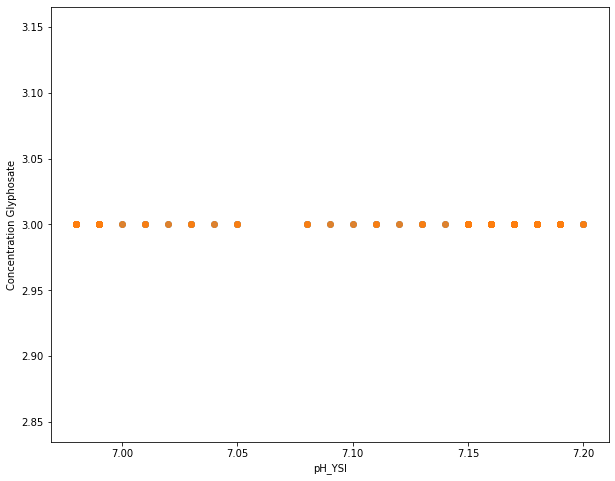

In [86]:
# Gráfico de Dispersión
fig, ax = plt.subplots(1, 1, figsize=(10,8))
# Azul
ax.scatter(x= data_00['pH_YSI_80ft'], y= data_00['concentration'], alpha= 0.8)
# Naranja
ax.scatter(x= data_00['pH_YSI_80ft'], y= data_00['concentration'], alpha= 0.8)
ax.set_xlabel('pH_YSI')
ax.set_ylabel('Concentration Glyphosate')

In [87]:
# Cálculo de correlaciones 

# Parametro 80ft
print("*** pH_YSI 80ft (mV) VS Concentración Glifosato ***")
print('Correlación Pearson: ', data_00['pH_YSI_80ft'].corr(data_00['concentration'], method='pearson'))
print('Correlación Spearman: ', data_00['pH_YSI_80ft'].corr(data_00['concentration'], method='spearman'))
print('Correlación Kendall: ', data_00['pH_YSI_80ft'].corr(data_00['concentration'], method='kendall'))
print("-------------------------------------------")

# Parametro 1100ft 
print("*** pH_YSI 1100ft (mV) VS Concentración Glifosato *** ")
print('Correlación Pearson: ', data_00['pH_YSI_1100ft'].corr(data_00['concentration'], method='pearson'))
print('Correlación Spearman: ', data_00['pH_YSI_1100ft'].corr(data_00['concentration'], method='spearman'))
print('Correlación Kendall: ', data_00['pH_YSI_1100ft'].corr(data_00['concentration'], method='kendall'))
print("-------------------------------------------")

*** pH_YSI 80ft (mV) VS Concentración Glifosato ***
Correlación Pearson:  nan
Correlación Spearman:  nan
Correlación Kendall:  nan
-------------------------------------------
*** pH_YSI 1100ft (mV) VS Concentración Glifosato *** 
Correlación Pearson:  nan
Correlación Spearman:  nan
Correlación Kendall:  nan
-------------------------------------------


### -------------------------------------------------------------------------------

### sp_cond

Text(0, 0.5, 'Concentration Glyphosate')

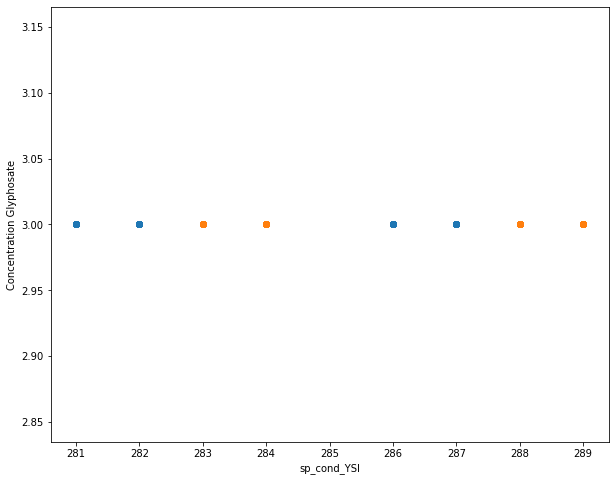

In [88]:
# Gráfico de Dispersión
fig, ax = plt.subplots(1, 1, figsize=(10,8))
# Azul
ax.scatter(x= data_00['sp_cond_YSI_80ft(µS/cm)'], y= data_00['concentration'], alpha= 0.8)
# Naranja
ax.scatter(x= data_00['sp_cond_YSI_1100ft(µS/cm)'], y= data_00['concentration'], alpha= 0.8)
ax.set_xlabel('sp_cond_YSI')
ax.set_ylabel('Concentration Glyphosate')

In [89]:
# Cálculo de correlaciones 

# Parametro 80ft
print("*** sp_cond_YSI 80ft (µS/cm) VS Concentración Glifosato ***")
print('Correlación Pearson: ', data_00['sp_cond_YSI_80ft(µS/cm)'].corr(data_00['concentration'], method='pearson'))
print('Correlación Spearman: ', data_00['sp_cond_YSI_80ft(µS/cm)'].corr(data_00['concentration'], method='spearman'))
print('Correlación Kendall: ', data_00['sp_cond_YSI_80ft(µS/cm)'].corr(data_00['concentration'], method='kendall'))
print("-------------------------------------------")

# Parametro 1100ft 
print("*** sp_cond_YSI 1100ft (µS/cm) VS Concentración Glifosato *** ")
print('Correlación Pearson: ', data_00['sp_cond_YSI_1100ft(µS/cm)'].corr(data_00['concentration'], method='pearson'))
print('Correlación Spearman: ', data_00['sp_cond_YSI_1100ft(µS/cm)'].corr(data_00['concentration'], method='spearman'))
print('Correlación Kendall: ', data_00['sp_cond_YSI_1100ft(µS/cm)'].corr(data_00['concentration'], method='kendall'))
print("-------------------------------------------")

*** sp_cond_YSI 80ft (µS/cm) VS Concentración Glifosato ***
Correlación Pearson:  nan
Correlación Spearman:  nan
Correlación Kendall:  nan
-------------------------------------------
*** sp_cond_YSI 1100ft (µS/cm) VS Concentración Glifosato *** 
Correlación Pearson:  nan
Correlación Spearman:  nan
Correlación Kendall:  nan
-------------------------------------------


### -------------------------------------------------------------------------------

### Turbidity YSI

Text(0, 0.5, 'Concentration Glyphosate')

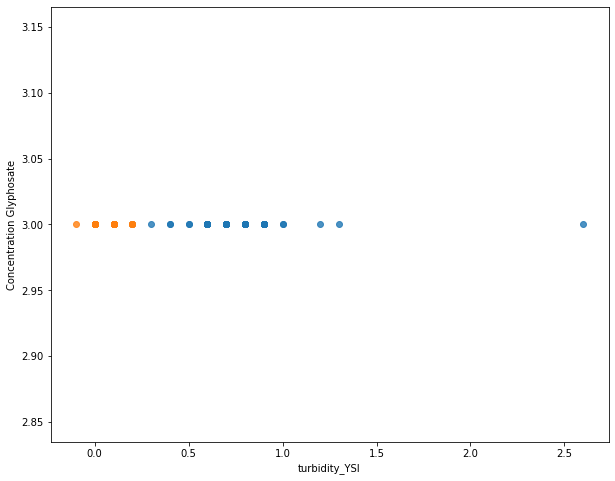

In [90]:
# Gráfico de Dispersión
fig, ax = plt.subplots(1, 1, figsize=(10,8))
# Azul
ax.scatter(x= data_00['turbidity_YSI_80ft(NTU+)'], y= data_00['concentration'], alpha= 0.8)
# Naranja
ax.scatter(x= data_00['turbidity_YSI_1100ft(NTU+)'], y= data_00['concentration'], alpha= 0.8)
ax.set_xlabel('turbidity_YSI')
ax.set_ylabel('Concentration Glyphosate')

In [91]:
# Cálculo de correlaciones 

# Parametro 80ft
print("*** turbidity_YSI 80ft (NTU+) VS Concentración Glifosato ***")
print('Correlación Pearson: ', data_00['turbidity_YSI_80ft(NTU+)'].corr(data_00['concentration'], method='pearson'))
print('Correlación Spearman: ', data_00['turbidity_YSI_80ft(NTU+)'].corr(data_00['concentration'], method='spearman'))
print('Correlación Kendall: ', data_00['turbidity_YSI_80ft(NTU+)'].corr(data_00['concentration'], method='kendall'))
print("-------------------------------------------")

# Parametro 1100ft 
print("*** turbidity_YSI 1100ft (NTU+) VS Concentración Glifosato *** ")
print('Correlación Pearson: ', data_00['turbidity_YSI_1100ft(NTU+)'].corr(data_00['concentration'], method='pearson'))
print('Correlación Spearman: ', data_00['turbidity_YSI_1100ft(NTU+)'].corr(data_00['concentration'], method='spearman'))
print('Correlación Kendall: ', data_00['turbidity_YSI_1100ft(NTU+)'].corr(data_00['concentration'], method='kendall'))
print("-------------------------------------------")

*** turbidity_YSI 80ft (NTU+) VS Concentración Glifosato ***
Correlación Pearson:  nan
Correlación Spearman:  nan
Correlación Kendall:  nan
-------------------------------------------
*** turbidity_YSI 1100ft (NTU+) VS Concentración Glifosato *** 
Correlación Pearson:  nan
Correlación Spearman:  nan
Correlación Kendall:  nan
-------------------------------------------


### -------------------------------------------------------------------------------

### Para cada parámetro VS Todas las concentración del glifosato (0.0, 0.4, 1.5 y 3.0)

### Chloride

Text(0, 0.5, 'Chloride(mg/L)')

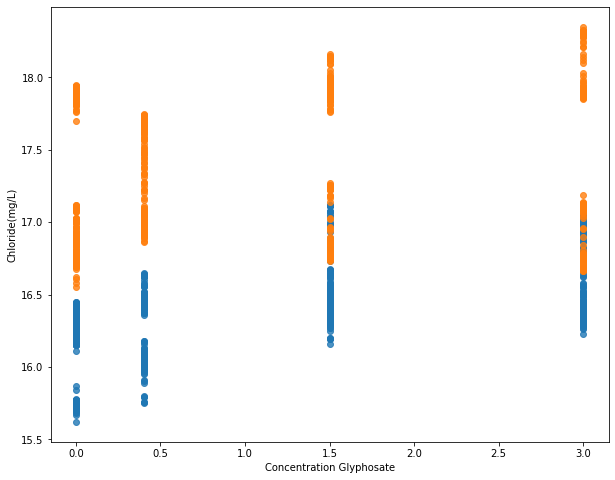

In [109]:
# Gráfico de Dispersión: Parámetro Chloride
fig, ax = plt.subplots(1, 1, figsize=(10,8))
# Azul
ax.scatter(x= data['concentration'], y= data['chloride_80ft(mg/L)'], alpha= 0.8)
# Naranja
ax.scatter(x= data['concentration'], y= data['chloride_1100ft(mg/L)'], alpha= 0.8)
ax.set_xlabel('Concentration Glyphosate')
ax.set_ylabel('Chloride(mg/L)')

#plt.savefig("chloride.png")

In [110]:
# Cálculo de correlaciones: Parámetro Chloride 

# Chloride 80ft (mg/L) VS Concentración Glifosato 
print("*** Chloride 80ft (mg/L) VS Concentración Glifosato ***")
print('Correlación Pearson: ', data['concentration'].corr(data['chloride_80ft(mg/L)'], method='pearson'))
print('Correlación Spearman: ', data['concentration'].corr(data['chloride_80ft(mg/L)'], method='spearman'))
print('Correlación Kendall: ', data['concentration'].corr(data['chloride_80ft(mg/L)'], method='kendall'))
print("-------------------------------------------")

# Chloride 1100 ft (mg/L) VS Concentración Glifosato  
print("*** Chloride 1100 ft (mg/L) VS Concentración Glifosato *** ")
print('Correlación Pearson: ', data['concentration'].corr(data['chloride_1100ft(mg/L)'], method='pearson'))
print('Correlación Spearman: ', data['concentration'].corr(data['chloride_1100ft(mg/L)'], method='spearman'))
print('Correlación Kendall: ', data['concentration'].corr(data['chloride_1100ft(mg/L)'], method='kendall'))
print("-------------------------------------------")


*** Chloride 80ft (mg/L) VS Concentración Glifosato ***
Correlación Pearson:  0.496707758390041
Correlación Spearman:  0.46868551468402375
Correlación Kendall:  0.35135593585866837
-------------------------------------------
*** Chloride 1100 ft (mg/L) VS Concentración Glifosato *** 
Correlación Pearson:  0.19311513503995298
Correlación Spearman:  0.17432143537220396
Correlación Kendall:  0.13701467363516331
-------------------------------------------


### -------------------------------------------------------------------------------

### CL2

Text(0, 0.5, 'Concentration Glyphosate')

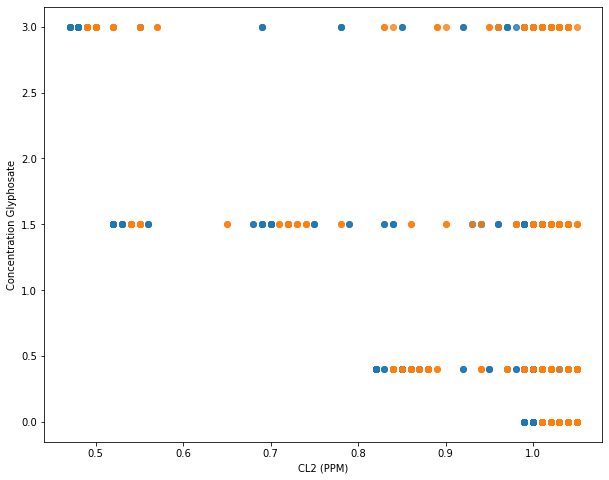

In [95]:
# Gráfico de Dispersión
fig, ax = plt.subplots(1, 1, figsize=(10,8))
# Azul
ax.scatter(x= data['CL2_80ft(PPM)'], y= data['concentration'], alpha= 0.8)
# Naranja
ax.scatter(x= data['CL2_1100ft(PPM)'], y= data['concentration'], alpha= 0.8)
ax.set_xlabel('CL2 (PPM)')
ax.set_ylabel('Concentration Glyphosate')

In [96]:
# Cálculo de correlaciones

# CL2 80ft (PPM) VS Concentración Glifosato 
print("*** CL2 80ft (PPM) VS Concentración Glifosato ***")
print('Correlación Pearson: ', data['CL2_80ft(PPM)'].corr(data['concentration'], method='pearson'))
print('Correlación Spearman: ', data['CL2_80ft(PPM)'].corr(data['concentration'], method='spearman'))
print('Correlación Kendall: ', data['CL2_80ft(PPM)'].corr(data['concentration'], method='kendall'))
print("-------------------------------------------")

# CL2 1100ft (PPM) VS Concentración Glifosato  
print("*** CL2 1100ft (PPM) VS Concentración Glifosato *** ")
print('Correlación Pearson: ', data['CL2_1100ft(PPM)'].corr(data['concentration'], method='pearson'))
print('Correlación Spearman: ', data['CL2_1100ft(PPM)'].corr(data['concentration'], method='spearman'))
print('Correlación Kendall: ', data['CL2_1100ft(PPM)'].corr(data['concentration'], method='kendall'))
print("-------------------------------------------")

*** CL2 80ft (PPM) VS Concentración Glifosato ***
Correlación Pearson:  -0.38728408489219757
Correlación Spearman:  -0.4204077070723936
Correlación Kendall:  -0.34134230688558115
-------------------------------------------
*** CL2 1100ft (PPM) VS Concentración Glifosato *** 
Correlación Pearson:  -0.39162669501491504
Correlación Spearman:  -0.40169905384525734
Correlación Kendall:  -0.32683541768286295
-------------------------------------------


### -------------------------------------------------------------------------------

### DO YSI

Text(0, 0.5, 'Concentration Glyphosate')

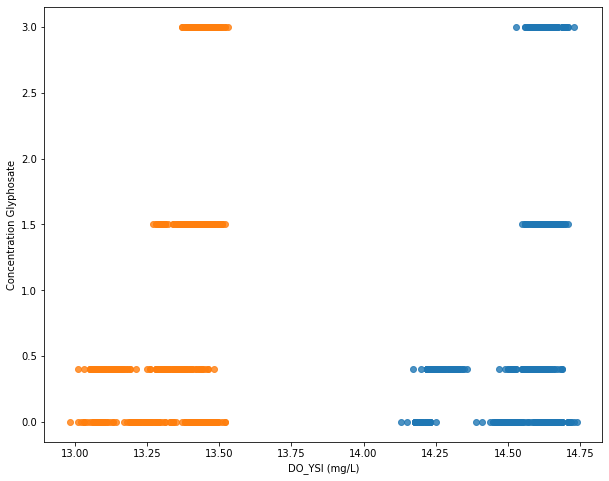

In [99]:
# Gráfico de Dispersión
fig, ax = plt.subplots(1, 1, figsize=(10,8))
# Azul
ax.scatter(x= data['DO_YSI_80ft(mg/L)'], y= data['concentration'], alpha= 0.8)
# Naranja
ax.scatter(x= data['DO_YSI_1100ft(mg/L)'], y= data['concentration'], alpha= 0.8)
ax.set_xlabel('DO_YSI (mg/L)')
ax.set_ylabel('Concentration Glyphosate')

In [100]:
# Cálculo de correlaciones: Parámetro DO

# DO 80ft (mg/L) VS Concentración Glifosato 
print("*** DO_YSI 80ft (mg/L) VS Concentración Glifosato ***")
print('Correlación Pearson: ', data['DO_YSI_80ft(mg/L)'].corr(data['concentration'], method='pearson'))
print('Correlación Spearman: ', data['DO_YSI_80ft(mg/L)'].corr(data['concentration'], method='spearman'))
print('Correlación Kendall: ', data['DO_YSI_80ft(mg/L)'].corr(data['concentration'], method='kendall'))
print("-------------------------------------------")

# C12 1100ft (PPM) VS Concentración Glifosato  
print("*** DO 1100ft (mg/L) VS Concentración Glifosato *** ")
print('Correlación Pearson: ', data['DO_YSI_1100ft(mg/L)'].corr(data['concentration'], method='pearson'))
print('Correlación Spearman: ', data['DO_YSI_1100ft(mg/L)'].corr(data['concentration'], method='spearman'))
print('Correlación Kendall: ', data['DO_YSI_1100ft(mg/L)'].corr(data['concentration'], method='kendall'))
print("-------------------------------------------")

*** DO_YSI 80ft (mg/L) VS Concentración Glifosato ***
Correlación Pearson:  0.41207193504558
Correlación Spearman:  0.31990760399472923
Correlación Kendall:  0.24283248793165527
-------------------------------------------
*** DO 1100ft (mg/L) VS Concentración Glifosato *** 
Correlación Pearson:  0.5227340963872991
Correlación Spearman:  0.45757948641820806
Correlación Kendall:  0.3693997421717727
-------------------------------------------


### -------------------------------------------------------------------------------

### FreeClorine ATI

Text(0, 0.5, 'Concentration Glyphosate')

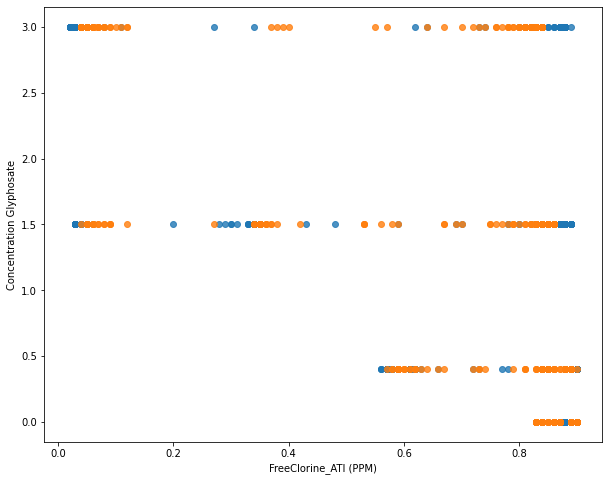

In [101]:
# Gráfico de Dispersión
fig, ax = plt.subplots(1, 1, figsize=(10,8))
# Azul
ax.scatter(x= data['FreeClorine_ATI_80ft(PPM)'], y= data['concentration'], alpha= 0.8)
# Naranja
ax.scatter(x= data['FreeClorine_ATI_1100ft(PPM)'], y= data['concentration'], alpha= 0.8)
ax.set_xlabel('FreeClorine_ATI (PPM)')
ax.set_ylabel('Concentration Glyphosate')

In [102]:
# Cálculo de correlaciones

# FreeClorine 80ft (PPM) VS Concentración Glifosato 
print("*** FreeClorine_ATI 80ft (PPM) VS Concentración Glifosato ***")
print('Correlación Pearson: ', data['FreeClorine_ATI_80ft(PPM)'].corr(data['concentration'], method='pearson'))
print('Correlación Spearman: ', data['FreeClorine_ATI_80ft(PPM)'].corr(data['concentration'], method='spearman'))
print('Correlación Kendall: ', data['FreeClorine_ATI_80ft(PPM)'].corr(data['concentration'], method='kendall'))
print("-------------------------------------------")

# FreeClorine 1100ft (PPM) VS Concentración Glifosato  
print("*** FreeClorine_ATI 1100ft (PPM) VS Concentración Glifosato *** ")
print('Correlación Pearson: ', data['FreeClorine_ATI_1100ft(PPM)'].corr(data['concentration'], method='pearson'))
print('Correlación Spearman: ', data['FreeClorine_ATI_1100ft(PPM)'].corr(data['concentration'], method='spearman'))
print('Correlación Kendall: ', data['FreeClorine_ATI_1100ft(PPM)'].corr(data['concentration'], method='kendall'))
print("-------------------------------------------")

*** FreeClorine_ATI 80ft (PPM) VS Concentración Glifosato ***
Correlación Pearson:  -0.3534676637974012
Correlación Spearman:  -0.5174986675526108
Correlación Kendall:  -0.41134054066939774
-------------------------------------------
*** FreeClorine_ATI 1100ft (PPM) VS Concentración Glifosato *** 
Correlación Pearson:  -0.4142573373821884
Correlación Spearman:  -0.555017687981567
Correlación Kendall:  -0.4297200748050273
-------------------------------------------


### -------------------------------------------------------------------------------

### FreeClorine X

Text(0, 0.5, 'Concentration Glyphosate')

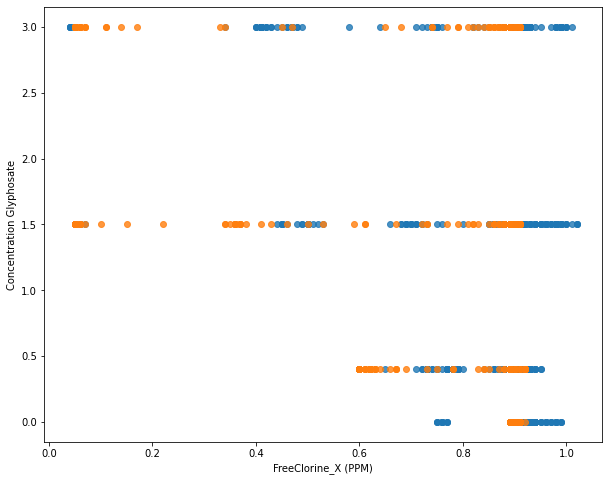

In [103]:
# Gráfico de Dispersión
fig, ax = plt.subplots(1, 1, figsize=(10,8))
# Azul
ax.scatter(x= data['FreeClorine_X_80ft(PPM)'], y= data['concentration'], alpha= 0.8)
# Naranja
ax.scatter(x= data['FreeClorine_X_1100ft(PPM)'], y= data['concentration'], alpha= 0.8)
ax.set_xlabel('FreeClorine_X (PPM)')
ax.set_ylabel('Concentration Glyphosate')

In [104]:
# Cálculo de correlaciones

# FreeClorine 80ft (PPM) VS Concentración Glifosato 
print("*** FreeClorine_X 80ft (PPM) VS Concentración Glifosato ***")
print('Correlación Pearson: ', data['FreeClorine_X_80ft(PPM)'].corr(data['concentration'], method='pearson'))
print('Correlación Spearman: ', data['FreeClorine_X_80ft(PPM)'].corr(data['concentration'], method='spearman'))
print('Correlación Kendall: ', data['FreeClorine_X_80ft(PPM)'].corr(data['concentration'], method='kendall'))
print("-------------------------------------------")

# FreeClorine 1100ft (PPM) VS Concentración Glifosato  
print("*** FreeClorine_X 1100ft (PPM) VS Concentración Glifosato *** ")
print('Correlación Pearson: ', data['FreeClorine_X_1100ft(PPM)'].corr(data['concentration'], method='pearson'))
print('Correlación Spearman: ', data['FreeClorine_X_1100ft(PPM)'].corr(data['concentration'], method='spearman'))
print('Correlación Kendall: ', data['FreeClorine_X_1100ft(PPM)'].corr(data['concentration'], method='kendall'))
print("-------------------------------------------")

*** FreeClorine_X 80ft (PPM) VS Concentración Glifosato ***
Correlación Pearson:  -0.3349488685652695
Correlación Spearman:  -0.22573991145896305
Correlación Kendall:  -0.18491383848754453
-------------------------------------------
*** FreeClorine_X 1100ft (PPM) VS Concentración Glifosato *** 
Correlación Pearson:  -0.3799881018395379
Correlación Spearman:  -0.37400744826679777
Correlación Kendall:  -0.29804502605186334
-------------------------------------------


### -------------------------------------------------------------------------------

### ORP

Text(0, 0.5, 'Concentration Glyphosate')

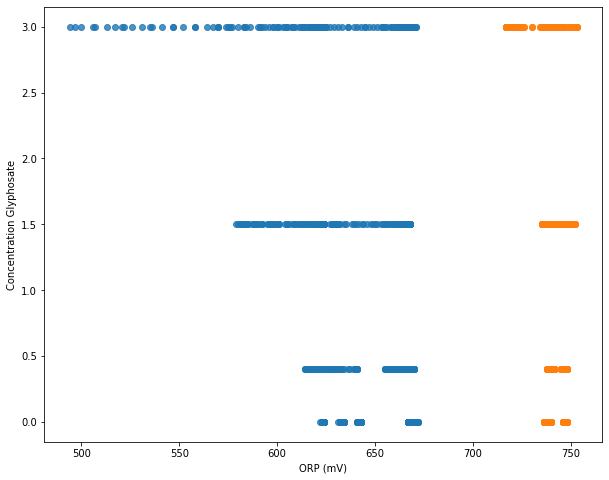

In [105]:
# Gráfico de Dispersión: Parámetro ORP
fig, ax = plt.subplots(1, 1, figsize=(10,8))
# Azul
ax.scatter(x= data['ORP_YSI_80ft(mV)'], y= data['concentration'], alpha= 0.8)
# Naranja
ax.scatter(x= data['ORP_YSI_1100ft(mV)'], y= data['concentration'], alpha= 0.8)
ax.set_xlabel('ORP (mV)')
ax.set_ylabel('Concentration Glyphosate')

In [106]:
# Cálculo de correlaciones

# ORP 80ft (mV) VS Concentración Glifosato 
print("*** ORP 80ft (mV) VS Concentración Glifosato ***")
print('Correlación Pearson: ', data['ORP_YSI_80ft(mV)'].corr(data['concentration'], method='pearson'))
print('Correlación Spearman: ', data['ORP_YSI_80ft(mV)'].corr(data['concentration'], method='spearman'))
print('Correlación Kendall: ', data['ORP_YSI_80ft(mV)'].corr(data['concentration'], method='kendall'))
print("-------------------------------------------")

# ORP 1100ft (mV) VS Concentración Glifosato  
print("*** ORP 1100ft (mV) VS Concentración Glifosato *** ")
print('Correlación Pearson: ', data['ORP_YSI_1100ft(mV)'].corr(data['concentration'], method='pearson'))
print('Correlación Spearman: ', data['ORP_YSI_1100ft(mV)'].corr(data['concentration'], method='spearman'))
print('Correlación Kendall: ', data['ORP_YSI_1100ft(mV)'].corr(data['concentration'], method='kendall'))
print("-------------------------------------------")

*** ORP 80ft (mV) VS Concentración Glifosato ***
Correlación Pearson:  -0.4452134313159043
Correlación Spearman:  -0.45289031347065123
Correlación Kendall:  -0.3595026130847855
-------------------------------------------
*** ORP 1100ft (mV) VS Concentración Glifosato *** 
Correlación Pearson:  -0.4312609622223317
Correlación Spearman:  -0.23016836099525634
Correlación Kendall:  -0.17584310815739906
-------------------------------------------


### -------------------------------------------------------------------------------

Text(0, 0.5, 'Concentration Glyphosate')

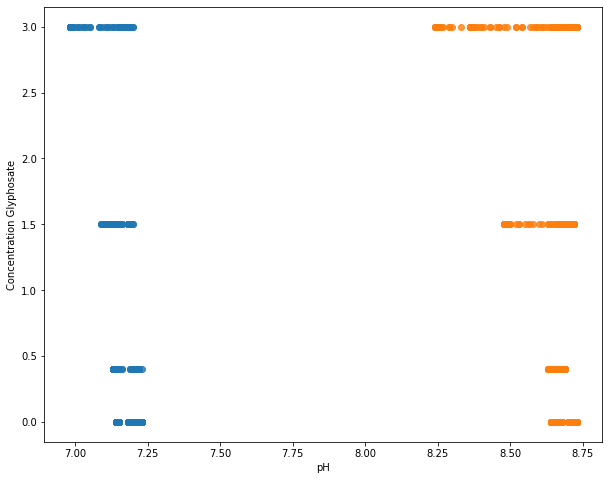

In [107]:
# Gráfico de Dispersión
fig, ax = plt.subplots(1, 1, figsize=(10,8))
# Azul
ax.scatter(x= data['pH_YSI_80ft'], y= data['concentration'], alpha= 0.8)
# Naranja
ax.scatter(x= data['pH_YSI_1100ft'], y= data['concentration'], alpha= 0.8)
ax.set_xlabel('pH')
ax.set_ylabel('Concentration Glyphosate')

In [ ]:
# Cálculo de correlaciones: Parámetro pH

# pH 80ft VS Concentración Glifosato 
print("*** pH 80ft VS Concentración Glifosato ***")
print('Correlación Pearson: ', data['pH_80ft'].corr(data['concentration'], method='pearson'))
print('Correlación Spearman: ', data['pH_80ft'].corr(data['concentration'], method='spearman'))
print('Correlación Kendall: ', data['pH_80ft'].corr(data['concentration'], method='kendall'))
print("-------------------------------------------")

# pH 1100ft VS Concentración Glifosato  
print("*** pH 1100ft VS Concentración Glifosato *** ")
print('Correlación Pearson: ', data['pH_1100ft'].corr(data['concentration'], method='pearson'))
print('Correlación Spearman: ', data['pH_1100ft'].corr(data['concentration'], method='spearman'))
print('Correlación Kendall: ', data['pH_1100ft'].corr(data['concentration'], method='kendall'))
print("-------------------------------------------")

*** pH 80ft VS Concentración Glifosato ***
Correlación Pearson:  -0.39747243720880676
Correlación Spearman:  -0.24538004094855695
Correlación Kendall:  -0.1998873668355288
-------------------------------------------
*** pH 1100ft VS Concentración Glifosato *** 
Correlación Pearson:  -0.3619759625734135
Correlación Spearman:  -0.17764139627901762
Correlación Kendall:  -0.14347498392568303
-------------------------------------------


### -------------------------------------------------------------------------------

Text(0, 0.5, 'Concentration Glyphosate')

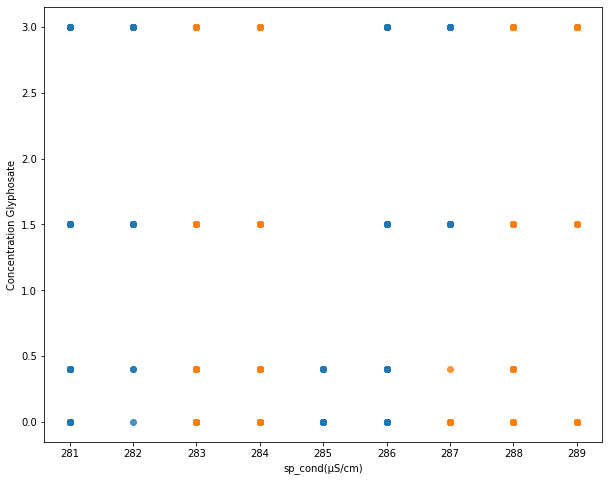

In [ ]:
# Gráfico de Dispersión: Parámetro sp_cond
fig, ax = plt.subplots(1, 1, figsize=(10,8))
# Azul
ax.scatter(x= data['sp_cond_80ft(µS/cm)'], y= data['concentration'], alpha= 0.8)
# Naranja
ax.scatter(x= data['sp_cond_1100ft(µS/cm)'], y= data['concentration'], alpha= 0.8)
ax.set_xlabel('sp_cond(µS/cm)')
ax.set_ylabel('Concentration Glyphosate')

In [ ]:
# Cálculo de correlaciones: Parámetro sp_cond

# sp_cond 80ft (mV) VS Concentración Glifosato 
print("*** sp_cond 80ft (mV) VS Concentración Glifosato ***")
print('Correlación Pearson: ', data['sp_cond_80ft(µS/cm)'].corr(data['concentration'], method='pearson'))
print('Correlación Spearman: ', data['sp_cond_80ft(µS/cm)'].corr(data['concentration'], method='spearman'))
print('Correlación Kendall: ', data['sp_cond_80ft(µS/cm)'].corr(data['concentration'], method='kendall'))
print("-------------------------------------------")

# sp_cond 1100ft (mV) VS Concentración Glifosato  
print("*** sp_cond 1100 ft (mV) VS Concentración Glifosato *** ")
print('Correlación Pearson: ', data['sp_cond_1100ft(µS/cm)'].corr(data['concentration'], method='pearson'))
print('Correlación Spearman: ', data['sp_cond_1100ft(µS/cm)'].corr(data['concentration'], method='spearman'))
print('Correlación Kendall: ', data['sp_cond_1100ft(µS/cm)'].corr(data['concentration'], method='kendall'))
print("-------------------------------------------")

*** sp_cond 80ft (mV) VS Concentración Glifosato ***
Correlación Pearson:  0.08510638379396712
Correlación Spearman:  0.16503018668581984
Correlación Kendall:  0.14469928474138902
-------------------------------------------
*** sp_cond 1100 ft (mV) VS Concentración Glifosato *** 
Correlación Pearson:  0.07671725451846767
Correlación Spearman:  0.13015407841924012
Correlación Kendall:  0.11403715291098988
-------------------------------------------


### -------------------------------------------------------------------------------

Text(0, 0.5, 'Concentration Glyphosate')

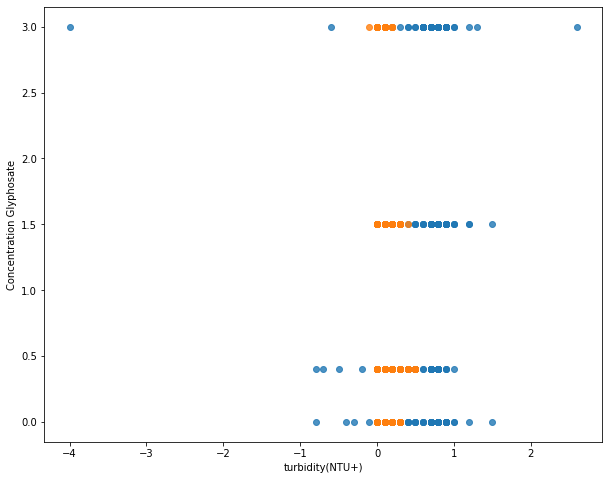

In [ ]:
# Gráfico de Dispersión: Parámetro turbidity
fig, ax = plt.subplots(1, 1, figsize=(10,8))
# Azul
ax.scatter(x= data['turbidity_80ft(NTU+)'], y= data['concentration'], alpha= 0.8)
# Naranja
ax.scatter(x= data['turbidity_1100ft(NTU+)'], y= data['concentration'], alpha= 0.8)
ax.set_xlabel('turbidity(NTU+)')
ax.set_ylabel('Concentration Glyphosate')

In [ ]:
# Cálculo de correlaciones: Parámetro turbidity

# turbidity 80ft (NTU+) VS Concentración Glifosato 
print("*** turbidity 80ft (NTU+) VS Concentración Glifosato ***")
print('Correlación Pearson: ', data['turbidity_80ft(NTU+)'].corr(data['concentration'], method='pearson'))
print('Correlación Spearman: ', data['turbidity_80ft(NTU+)'].corr(data['concentration'], method='spearman'))
print('Correlación Kendall: ', data['turbidity_80ft(NTU+)'].corr(data['concentration'], method='kendall'))
print("-------------------------------------------")

# turbidity 1100ft (NTU+) VS Concentración Glifosato  
print("*** turbidity 1100 ft (NTU+) VS Concentración Glifosato *** ")
print('Correlación Pearson: ', data['turbidity_1100ft(NTU+)'].corr(data['concentration'], method='pearson'))
print('Correlación Spearman: ', data['turbidity_1100ft(NTU+)'].corr(data['concentration'], method='spearman'))
print('Correlación Kendall: ', data['turbidity_1100ft(NTU+)'].corr(data['concentration'], method='kendall'))
print("-------------------------------------------")

*** turbidity 80ft (NTU+) VS Concentración Glifosato ***
Correlación Pearson:  0.021489793306346674
Correlación Spearman:  0.027893816223143988
Correlación Kendall:  0.02404229600391699
-------------------------------------------
*** turbidity 1100 ft (NTU+) VS Concentración Glifosato *** 
Correlación Pearson:  -0.12646118037525905
Correlación Spearman:  -0.056694301097414405
Correlación Kendall:  -0.04895652541863845
-------------------------------------------
